In [1]:
import pandas as pd

read_path = "NEW.csv"
df_data_final_2 = pd.read_csv(open(read_path,encoding = "utf8"))
df_label_2 = df_data_final_2[['收得率']]

In [2]:
df_data_final_2.columns

Index(['收得率', '炉号', '钢号', '转炉终点温度', '转炉终点C', '转炉终点Mn', '转炉终点S', '转炉终点P',
       '转炉终点Si', '钢水净重', '连铸正样C', '连铸正样Mn', '连铸正样S', '连铸正样P', '连铸正样Si',
       '连铸正样Ceq_val', '连铸正样Cr', '连铸正样Ni_val', '连铸正样Cu_val', '连铸正样V_val',
       '连铸正样Alt_val', '连铸正样Als_val', '连铸正样Mo_val', '连铸正样Ti_val',
       '氮化钒铁FeV55N11-A', '低铝硅铁', '钒氮合金(进口)', '钒铁(FeV50-A)', '钒铁(FeV50-B)',
       '钒铁(FeV50-B).1', '硅铝钙', '硅铝合金FeAl30Si25', '硅铝锰合金球', '硅锰面（硅锰渣）',
       '硅铁(合格块)', '硅铁FeSi75-B', '石油焦增碳剂', '锰硅合金FeMn64Si27(合格块)',
       '锰硅合金FeMn68Si18(合格块)', '碳化硅(55%)', '硅钙碳脱氧剂', '氧化后钢水净重'],
      dtype='object')

In [11]:
df_data_2 = df_data_final_2[[ '转炉终点温度', '转炉终点C', '转炉终点Mn', '转炉终点S', '转炉终点P', '转炉终点Si',
       '钢水净重', '氮化钒铁FeV55N11-A', '低铝硅铁', '钒氮合金(进口)',
       '钒铁(FeV50-A)', '钒铁(FeV50-B)', '钒铁(FeV50-B).1', '硅铝钙', '硅铝合金FeAl30Si25',
       '硅铝锰合金球', '硅锰面（硅锰渣）', '硅铁(合格块)', '硅铁FeSi75-B', '石油焦增碳剂',
       '锰硅合金FeMn64Si27(合格块)', '锰硅合金FeMn68Si18(合格块)', '碳化硅(55%)', '硅钙碳脱氧剂']]

len(df_data_2),len(df_label_2)

(225, 225)

In [12]:
df_result = pd.read_csv("df_result.csv")
df_data_2.columns

Index(['转炉终点温度', '转炉终点C', '转炉终点Mn', '转炉终点S', '转炉终点P', '转炉终点Si', '钢水净重',
       '氮化钒铁FeV55N11-A', '低铝硅铁', '钒氮合金(进口)', '钒铁(FeV50-A)', '钒铁(FeV50-B)',
       '钒铁(FeV50-B).1', '硅铝钙', '硅铝合金FeAl30Si25', '硅铝锰合金球', '硅锰面（硅锰渣）',
       '硅铁(合格块)', '硅铁FeSi75-B', '石油焦增碳剂', '锰硅合金FeMn64Si27(合格块)',
       '锰硅合金FeMn68Si18(合格块)', '碳化硅(55%)', '硅钙碳脱氧剂'],
      dtype='object')

In [13]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

standardScaler = StandardScaler()
standardScaler.fit(df_data_2)
df_future = pd.DataFrame(standardScaler.transform(df_data_2))
df_future.columns = df_data_2.columns

In [14]:
from sklearn import metrics
metrics.SCORERS.keys()

dict_keys(['explained_variance', 'neg_mean_absolute_error', 'f1_samples', 'recall_macro', 'fowlkes_mallows_score', 'recall_samples', 'brier_score_loss', 'neg_mean_squared_log_error', 'precision', 'neg_log_loss', 'recall_weighted', 'neg_mean_squared_error', 'neg_median_absolute_error', 'recall', 'precision_macro', 'average_precision', 'f1', 'adjusted_rand_score', 'f1_micro', 'precision_micro', 'normalized_mutual_info_score', 'homogeneity_score', 'r2', 'adjusted_mutual_info_score', 'v_measure_score', 'completeness_score', 'recall_micro', 'balanced_accuracy', 'roc_auc', 'accuracy', 'mutual_info_score', 'precision_weighted', 'precision_samples', 'f1_weighted', 'f1_macro'])

In [15]:
def Train_model(model, y="收得率",scoring="neg_mean_squared_error"):

    # 训练模型，估计模型参数
    model.fit(df_future, df_label_2[y])

    from sklearn.model_selection import cross_val_score
    scores_clf_svc_cv = cross_val_score(
        model, df_future, df_label_2[y], cv=10, scoring=scoring)

    print(np.mean(scores_clf_svc_cv), scores_clf_svc_cv)
    
    return model

# model.coef_, model.intercept_

In [16]:
from sklearn import ensemble
randomForestRegressor = ensemble.RandomForestRegressor(n_estimators=15,random_state=42)

randomForestRegressor = Train_model(model=randomForestRegressor)

randomForestRegressor

-0.02386953793769494 [-0.00962188 -0.00087591 -0.00116301 -0.22093746 -0.00085136 -0.00090688
 -0.00137533 -0.00090963 -0.00098158 -0.00107235]


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=15, n_jobs=None,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

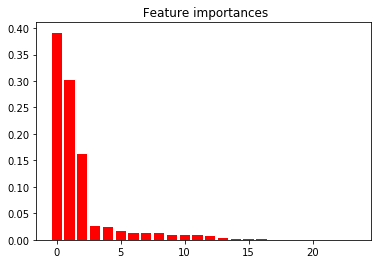

array([1.26234137e-02, 6.74450505e-03, 2.55434149e-02, 1.22424433e-02,
       1.57081855e-02, 8.86302936e-03, 3.91262438e-01, 0.00000000e+00,
       3.01967752e-01, 8.17120065e-03, 0.00000000e+00, 0.00000000e+00,
       2.40066669e-02, 8.50070679e-04, 1.30330947e-02, 0.00000000e+00,
       9.91239806e-03, 0.00000000e+00, 1.55923916e-04, 3.04669552e-03,
       8.13016165e-04, 1.62857233e-01, 1.87739474e-03, 3.21124311e-04])

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline

importances = randomForestRegressor.feature_importances_
std = np.std([randomForestRegressor.feature_importances_ for tree in randomForestRegressor.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

plt.title(" Feature importances")
plt.bar(range(df_future.shape[1]), importances[indices],
        color="r", yerr=std[indices], align="center")
# plt.xticks(range(X.shape[1]), indices)
# plt.xlim([-1, X.shape[1]])
plt.show()

randomForestRegressor.feature_importances_

In [18]:
from sklearn import linear_model
linearRegression = linear_model.LinearRegression()

linearRegression  = Train_model(model=linearRegression,scoring='r2')
linearRegression.coef_, linearRegression.intercept_

0.5757238507718964 [0.79915834 0.74583165 0.45522063 0.93266123 0.50196486 0.60631713
 0.00557995 0.24809231 0.82796197 0.63445045]


(array([-8.65560256e-04,  5.96957004e-04, -1.65280545e-02, -4.08128274e-03,
         4.41619207e-03, -7.83206552e-06,  1.20646986e-01,  3.09907228e-04,
         3.85291708e-02, -1.54008211e-02,  9.36750677e-17, -1.17961196e-16,
        -1.59789583e-02, -2.93126731e-03, -2.73792310e-03,  1.73472348e-18,
        -3.74535863e-02,  5.09575021e-18,  1.92890199e-02, -1.62260923e-03,
        -1.33746822e-01, -1.38696447e-01, -3.18485426e-03, -3.17195732e-03]),
 0.9016808188888891)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002A1AAECA2E8>]],
      dtype=object)

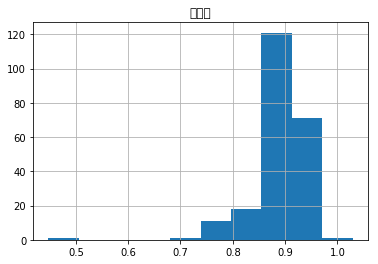

In [25]:
df_label_2[df_label_2 <= 1.1].hist()

In [20]:
df_label_2

,收得率
0,0.920269
1,0.857033
2,0.732074
3,0.897417
4,0.887767
5,0.447355
6,0.923588
7,0.942004
8,0.876863
9,0.895663
